In [1]:
!pip install pennylane --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.7 MB/s eta 0:00:00


In [13]:
import pennylane as qml

n_cells = [2, 2]
hopping = 0.2
onsite = 0.3

hamiltonian = qml.spin.fermi_hubbard('square', n_cells, hopping, onsite)
print('Hamiltonian:\n')
hamiltonian

Hamiltonian:



(
    -0.1 * (Y(0) @ Z(1) @ Y(2))
  + -0.1 * (X(0) @ Z(1) @ X(2))
  + 0.3 * I(0)
  + -0.1 * (Y(1) @ Z(2) @ Y(3))
  + -0.1 * (X(1) @ Z(2) @ X(3))
  + -0.1 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Y(4))
  + -0.1 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ X(4))
  + -0.1 * (Y(1) @ Z(2) @ Z(3) @ Z(4) @ Y(5))
  + -0.1 * (X(1) @ Z(2) @ Z(3) @ Z(4) @ X(5))
  + -0.1 * (Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6))
  + -0.1 * (X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6))
  + -0.1 * (Y(3) @ Z(4) @ Z(5) @ Z(6) @ Y(7))
  + -0.1 * (X(3) @ Z(4) @ Z(5) @ Z(6) @ X(7))
  + -0.1 * (Y(4) @ Z(5) @ Y(6))
  + -0.1 * (X(4) @ Z(5) @ X(6))
  + -0.1 * (Y(5) @ Z(6) @ Y(7))
  + -0.1 * (X(5) @ Z(6) @ X(7))
  + -0.075 * Z(1)
  + -0.075 * Z(0)
  + 0.075 * (Z(0) @ Z(1))
  + -0.075 * Z(3)
  + -0.075 * Z(2)
  + 0.075 * (Z(2) @ Z(3))
  + -0.075 * Z(5)
  + -0.075 * Z(4)
  + 0.075 * (Z(4) @ Z(5))
  + -0.075 * Z(7)
  + -0.075 * Z(6)
  + 0.075 * (Z(6) @ Z(7))
)

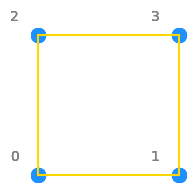

In [14]:
import matplotlib.pyplot as plt

def plot(lattice, figsize=None, showlabel=True):

    # initialize the plot
    if not figsize:
        figsize = lattice.n_cells[::-1]

    plt.figure(figsize=figsize)

    # get lattice nodes and edges and plot them
    nodes = lattice.lattice_points

    for edge in lattice.edges:
        start_index, end_index, color = edge
        start_pos, end_pos = nodes[start_index], nodes[end_index]

        x_axis = [start_pos[0], end_pos[0]]
        y_axis = [start_pos[1], end_pos[1]]
        plt.plot(x_axis, y_axis, color='gold')

        plt.scatter(nodes[:,0], nodes[:,1], color='dodgerblue', s=100)

        if showlabel:
            for index, pos in enumerate(nodes):
                plt.text(pos[0]-0.2, pos[1]+0.1, str(index), color='gray')

    plt.axis("off")
    plt.show()

lattice = qml.spin.generate_lattice('square', n_cells)
plot(lattice)

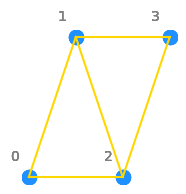

In [15]:
coupling = [0.5, 0.5, 0.5]
hamiltonian = qml.spin.heisenberg('triangle', n_cells, coupling)

lattice = qml.spin.generate_lattice('triangle', n_cells)
plot(lattice)

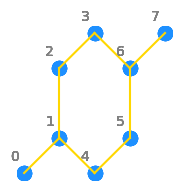

In [16]:
coupling, h = 0.5, 1.0
hamiltonian = qml.spin.transverse_ising('honeycomb', n_cells, coupling, h)

lattice = qml.spin.generate_lattice('honeycomb', n_cells)
plot(lattice)


In [17]:
coupling = [0.5, 0.6, 0.7]
hamiltonian = qml.spin.kitaev(n_cells, coupling)

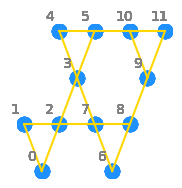

In [18]:
hopping = 0.5
hopping_next = 1.0
phi = 0.1
hamiltonian = qml.spin.haldane('kagome', n_cells, hopping, hopping_next, phi)

lattice = qml.spin.generate_lattice('kagome', n_cells)
plot(lattice)

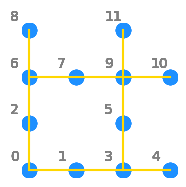

In [19]:
hopping = 0.5
coulomb = 1.0
intersite_coupling = 0.2
hamiltonian = qml.spin.emery('lieb', n_cells, hopping, coulomb, intersite_coupling)

lattice = qml.spin.generate_lattice('lieb', n_cells)
plot(lattice)

In [20]:
lattice = qml.spin.generate_lattice('square', [3, 3])

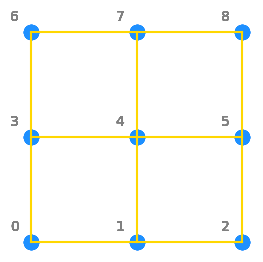

In [21]:
plot(lattice)

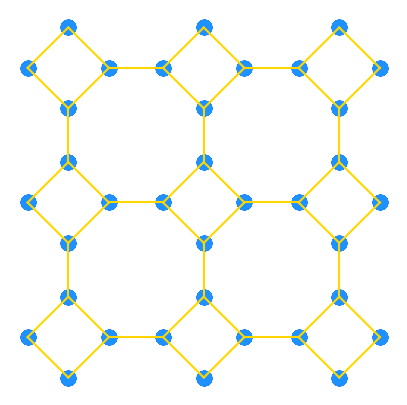

In [22]:
from pennylane.spin import Lattice

positions = [[0.2, 0.5], [0.5, 0.2],
             [0.5, 0.8], [0.8, 0.5]] # coordinates of sites
vectors = [[1, 0], [0, 1]] # primitive translation vectors
n_cells = [3, 3] # number of unit cells in each direction

lattice = Lattice(n_cells, vectors, positions, neighbour_order=2)

plot(lattice, figsize = (5, 5), showlabel=False)


In [23]:
from pennylane import X, Y, Z

coupling, onsite = 0.25, 0.75

hamiltonian = 0.0
# add the one-site terms
for vertex in range(lattice.n_sites):
    hamiltonian += -onsite * X(vertex)

# add the coupling terms
for edge in lattice.edges_indices:
    i, j = edge[0], edge[1]
    hamiltonian += - coupling * (Z(i) @ Z(j))

hamiltonian

(
    -0.75 * X(0)
  + -0.75 * X(1)
  + -0.75 * X(2)
  + -0.75 * X(3)
  + -0.75 * X(4)
  + -0.75 * X(5)
  + -0.75 * X(6)
  + -0.75 * X(7)
  + -0.75 * X(8)
  + -0.75 * X(9)
  + -0.75 * X(10)
  + -0.75 * X(11)
  + -0.75 * X(12)
  + -0.75 * X(13)
  + -0.75 * X(14)
  + -0.75 * X(15)
  + -0.75 * X(16)
  + -0.75 * X(17)
  + -0.75 * X(18)
  + -0.75 * X(19)
  + -0.75 * X(20)
  + -0.75 * X(21)
  + -0.75 * X(22)
  + -0.75 * X(23)
  + -0.75 * X(24)
  + -0.75 * X(25)
  + -0.75 * X(26)
  + -0.75 * X(27)
  + -0.75 * X(28)
  + -0.75 * X(29)
  + -0.75 * X(30)
  + -0.75 * X(31)
  + -0.75 * X(32)
  + -0.75 * X(33)
  + -0.75 * X(34)
  + -0.75 * X(35)
  + -0.25 * (Z(2) @ Z(5))
  + -0.25 * (Z(3) @ Z(12))
  + -0.25 * (Z(6) @ Z(9))
  + -0.25 * (Z(7) @ Z(16))
  + -0.25 * (Z(11) @ Z(20))
  + -0.25 * (Z(14) @ Z(17))
  + -0.25 * (Z(15) @ Z(24))
  + -0.25 * (Z(18) @ Z(21))
  + -0.25 * (Z(19) @ Z(28))
  + -0.25 * (Z(23) @ Z(32))
  + -0.25 * (Z(26) @ Z(29))
  + -0.25 * (Z(30) @ Z(33))
  + -0.25 * (Z(0) @ Z(1))
  + 